In [1]:
###

#BigMart Sales Prediction practice problem

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.
    
#


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

In [3]:
df_train = pd.read_csv(r"bigdatamart.csv",engine='python')
df_test = pd.read_csv(r"bigdatamart1.csv",engine='python')

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df_train.shape

(5681, 11)

In [8]:
df_train.dtypes




Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [9]:
# we will be required to convert the values into numbers through the process of label encoding or one hot encoding technique.

In [10]:
df_train.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [11]:
#we see that only two columns have null values associated with them which are Item_Weight and Outlet_Size. 
#Let us visualise it with a heatmap.

<AxesSubplot:>

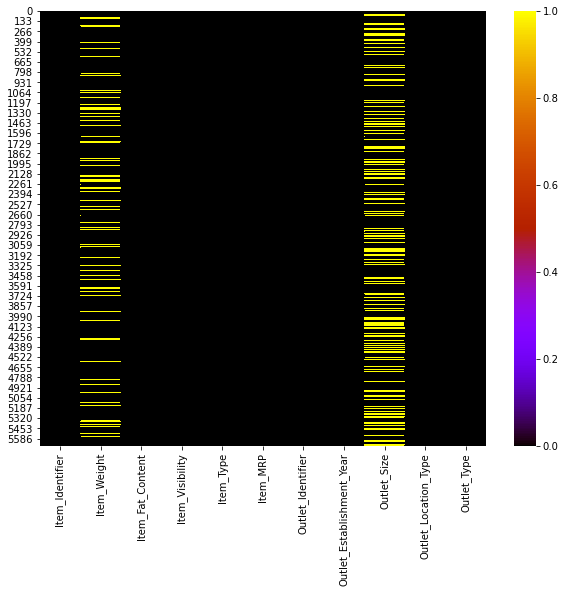

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isna(),cmap='gnuplot')

In [13]:
#The yellow marks show presence of null values. 
#We have a few null values in these two columns that will need to be sorted out

In [14]:
df_train['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


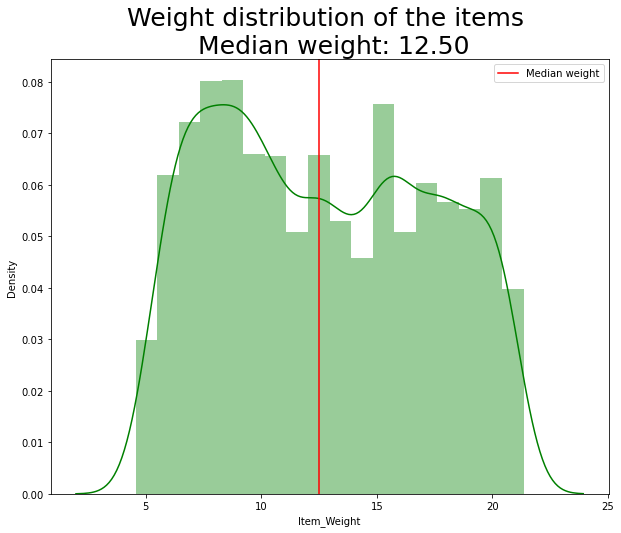

In [15]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Weight'].dropna(),color='green')
plt.title('Weight distribution of the items \n Median weight: {0:.2f}'.format(df_train['Item_Weight'].dropna().median()),size=25)
plt.axvline(df_train['Item_Weight'].dropna().median(),color='red',label='Median weight')
plt.legend()

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_v

Text(0.5, 1.0, 'Violinplot of weights')

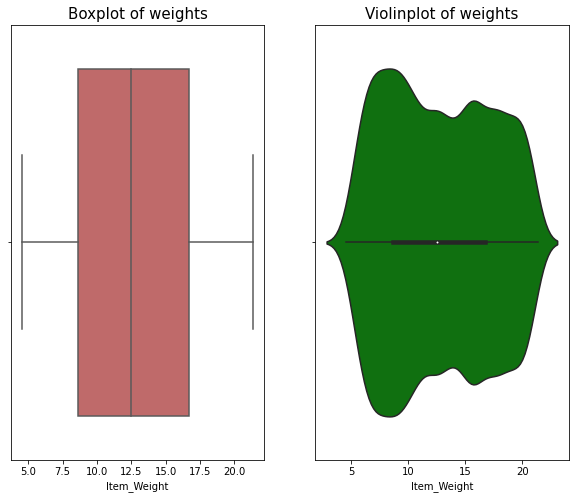

In [16]:
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(121)
sns.boxplot(df_train['Item_Weight'],ax=ax1,orient='v',color='indianred')
ax1.set_title('Boxplot of weights',size=15)

ax2=fig1.add_subplot(122)
sns.violinplot(df_train['Item_Weight'],ax=ax2,orient='v',color='green')
ax2.set_title('Violinplot of weights',size=15)

In [17]:
#As we can see from the above violin and distplot, the curve platueus over a large range of weights. 
#Hence, it is simply not possible for us to assume a weight for the null values. We shall leave them as it is or drop them

In [18]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [19]:
#Technically, we have only two unique values which are either low fat or regular.

In [20]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('low fat','Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('LF','Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('reg','Regular')
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

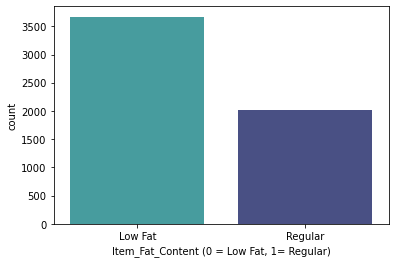

In [21]:
sns.countplot(x='Item_Fat_Content', data=df_train, palette="mako_r")
plt.xlabel("Item_Fat_Content (0 = Low Fat, 1= Regular)")
plt.show()

In [22]:
#This assumes that majority of customers are health conscious and prefer food with lower fat rating.

In [23]:
df_train['Item_Visibility'].describe()

count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


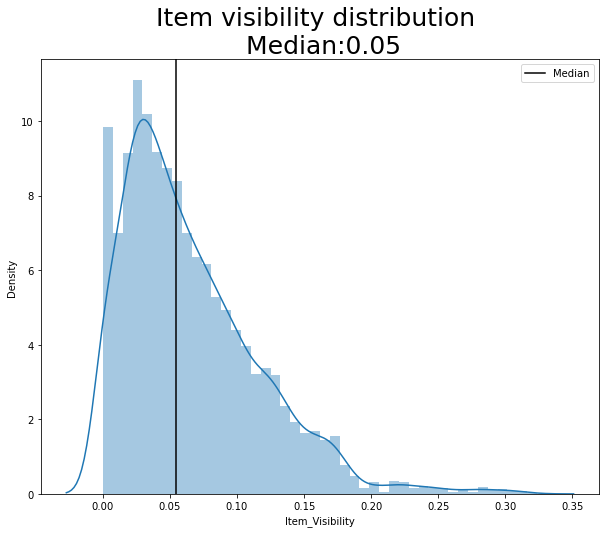

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Visibility'])
plt.title('Item visibility distribution \n Median:{0:.2f}'.format(df_train['Item_Visibility'].median()),size=25)
plt.axvline(df_train['Item_Visibility'].median(),color='black',label='Median')
plt.legend()

In [25]:
#As we see from the curve, the item visibility has a right skew.
#Hence, a median would give us better indication than a mean value. Let us check for outliers if any.

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


((array([-3.66846817, -3.43512194, -3.30661218, ...,  3.30661218,
          3.43512194,  3.66846817]),
  array([0.        , 0.        , 0.        , ..., 0.31354154, 0.31393469,
         0.32363725])),
 (0.04893476670988879, 0.06568385968808309, 0.9542964768547567))

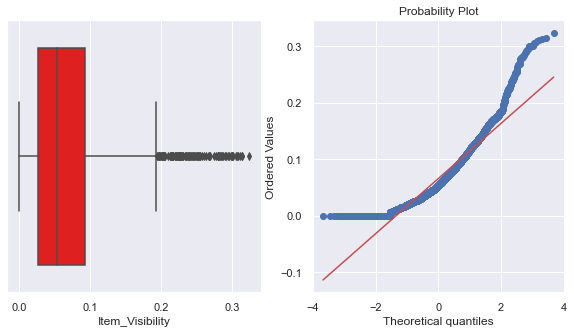

In [30]:
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(df_train['Item_Visibility'],orient='v',ax=ax1,color='red')
ax2=fig3.add_subplot(122)
stats.probplot(df_train['Item_Visibility'],plot=ax2)

In [31]:
#As we can see, values above 0.2 visibility are outliers.
#Hence, we need to remove the outliers and try to form a normal distribution.

#The probplot also seems to suggest that the values are deviating from the normal values after 0.2

In [32]:
df_train[df_train['Item_Visibility']>0.2].shape[0]

106

((array([-3.66364926, -3.43001498, -3.30133217, ...,  3.30133217,
          3.43001498,  3.66364926]),
  array([0.        , 0.        , 0.        , ..., 0.19689764, 0.19767982,
         0.19982599])),
 (0.043661528748019485, 0.06224420340484304, 0.9705157514447575))

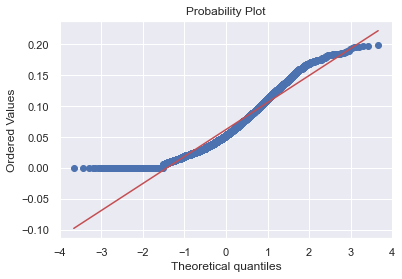

In [33]:
df_train=df_train[df_train['Item_Visibility']<0.2]
stats.probplot(df_train['Item_Visibility'],plot=plt)

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


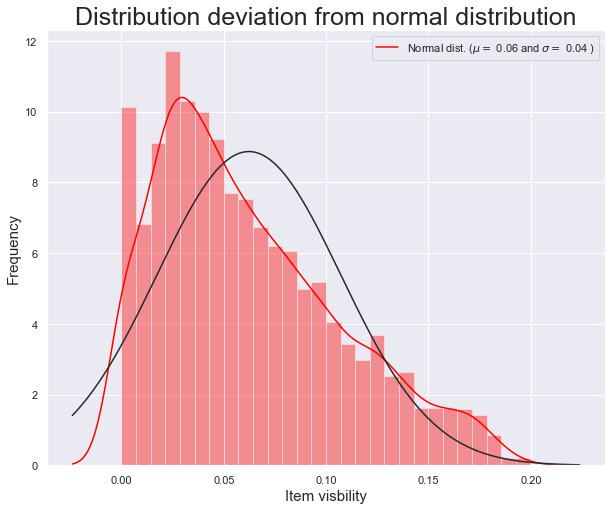

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Visibility'],fit=norm,color='red')
plt.title('Distribution deviation from normal distribution',size=25)
plt.ylabel('Frequency',size=15)
plt.xlabel('Item visbility',size=15)
mu=df_train['Item_Visibility'].mean()
sigma=df_train['Item_Visibility'].std()
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma=$ {1:.2f} )'.format(mu, sigma)])

In [35]:
df_train['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [36]:
df_train.Item_Type.value_counts()

Snack Foods              771
Fruits and Vegetables    766
Household                631
Frozen Foods             551
Dairy                    446
Baking Goods             433
Canned                   423
Health and Hygiene       334
Meat                     308
Soft Drinks              278
Breads                   160
Hard Drinks              145
Starchy Foods            119
Others                   110
Breakfast                 75
Seafood                   25
Name: Item_Type, dtype: int64

In [37]:
# we see that fruits and vegetables were the highest sold item followed closely by Snack foods.

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


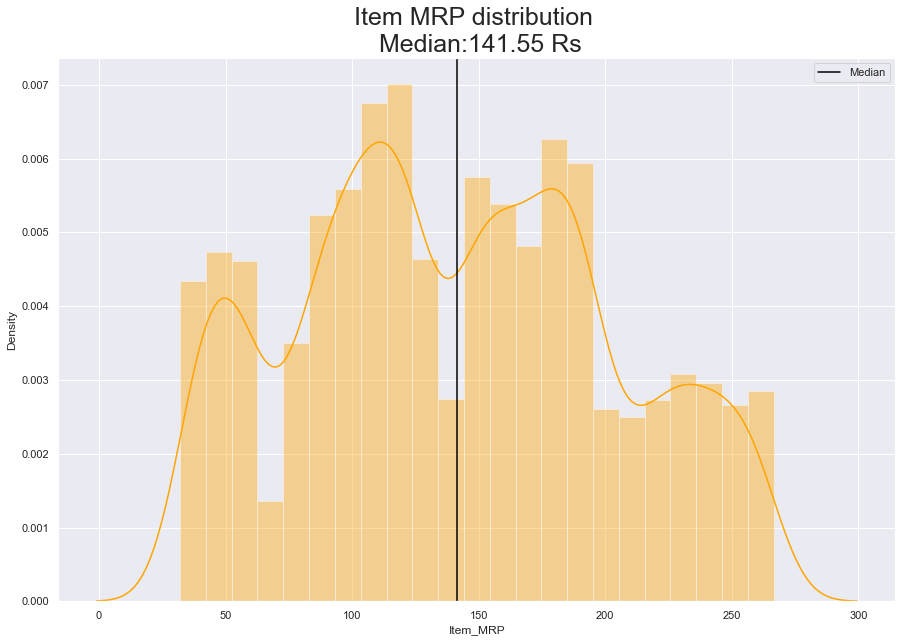

In [38]:
plt.figure(figsize=(15,10))
sns.distplot(df_train['Item_MRP'],color='orange')
plt.title('Item MRP distribution \n Median:{0:.2f} Rs'.format(df_train['Item_MRP'].median()),size=25)
plt.axvline(df_train['Item_MRP'].median(),color='black',label='Median')
plt.legend()

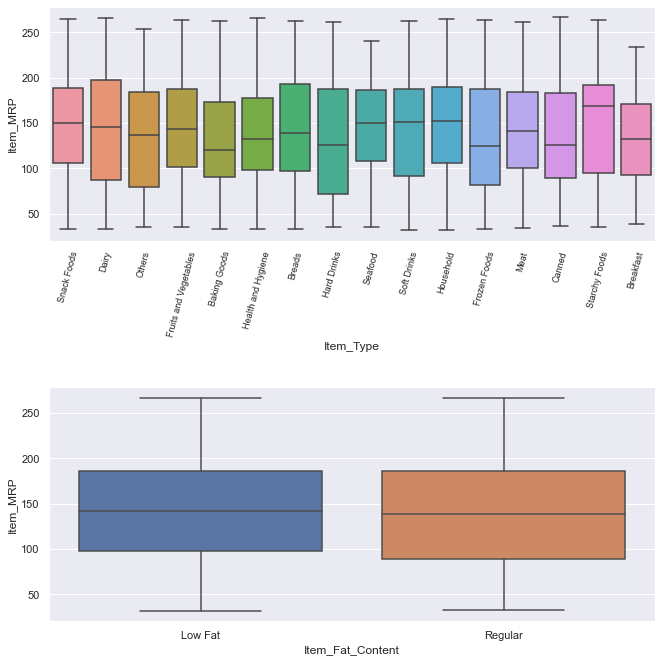

In [39]:
labels=df_train['Item_Type'].unique()
fig6=plt.figure(figsize=(10,10))
ax1=fig6.add_subplot(211)
sns.boxplot(x='Item_Type',y='Item_MRP',data=df_train,ax=ax1)
ax1.set_xticklabels(labels, rotation=75,size=9)

ax2=fig6.add_subplot(212)
sns.boxplot(x='Item_Fat_Content',y='Item_MRP',data=df_train,ax=ax2)

fig6.tight_layout(pad=3)

In [40]:
#we see which item types have high MRPs. Dairy product and Starchy foods have a higher median price than the rest.

#Both low and regular food have almost identical median price.

In [41]:
df_train['Outlet_Identifier'].unique()


array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [42]:
df_train.Outlet_Identifier.value_counts()

OUT027    624
OUT013    621
OUT046    620
OUT049    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    317
OUT019    299
Name: Outlet_Identifier, dtype: int64

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

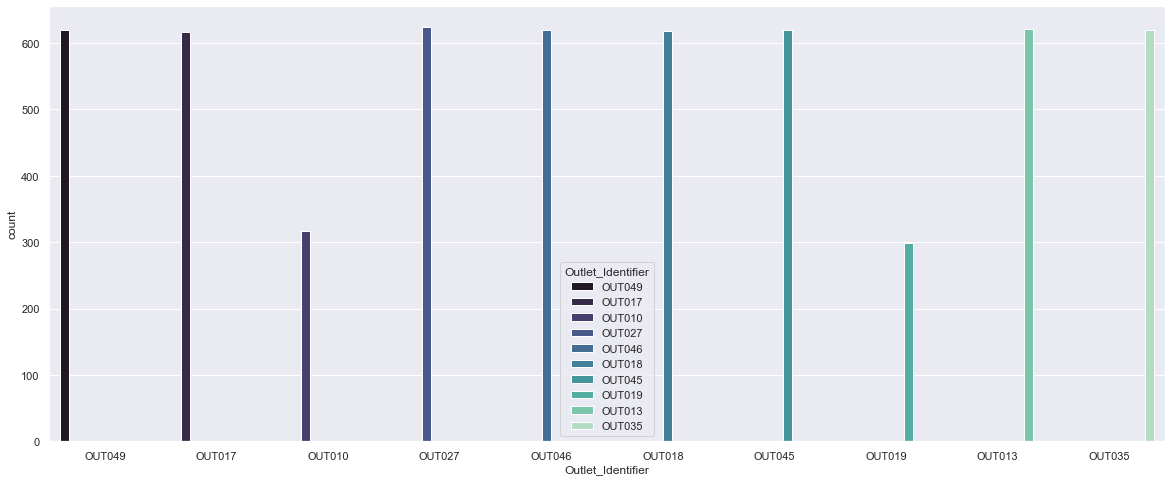

In [43]:
plt.figure(figsize=(20,8))
sns.countplot('Outlet_Identifier',hue='Outlet_Identifier',data=df_train,palette='mako')

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_MRP'>

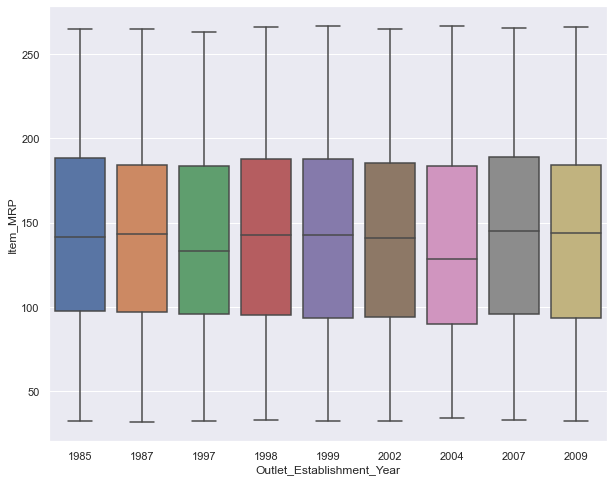

In [44]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Establishment_Year','Item_MRP',data=df_train)

In [45]:
#the median prices of items sold is nearly the same. 
#Hence, customers have no bias to buy more expensive products from older or newer markets.

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=df_train)
plt.title('Outlet sales',size=25)

ValueError: Could not interpret input 'Item_Outlet_Sales'

<Figure size 720x576 with 0 Axes>

In [48]:
df_train['Outlet_Size'].isna().value_counts()

False    4022
True     1553
Name: Outlet_Size, dtype: int64

In [49]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

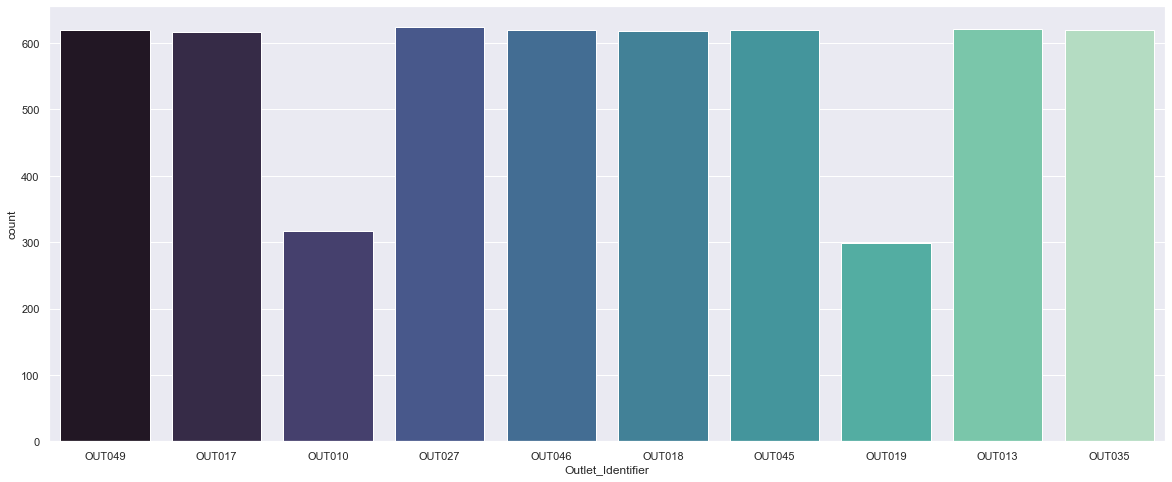

In [50]:
plt.figure(figsize=(20,8))
sns.countplot('Outlet_Identifier',data=df_train,palette='mako')

In [51]:
df_size_sales=df_train.groupby('Outlet_Size')[['Item_MRP','Item_Outlet_Sales']].mean().reset_index()

KeyError: "Columns not found: 'Item_Outlet_Sales'"

In [52]:
df_size_sales

NameError: name 'df_size_sales' is not defined

NameError: name 'df_size_sales' is not defined

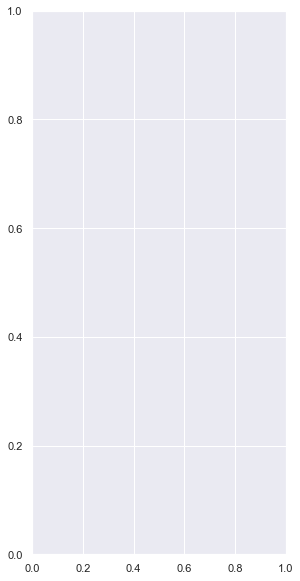

In [53]:
fig8=plt.figure(figsize=(10,10))
ax1=fig8.add_subplot(121)
sns.barplot('Outlet_Size','Item_MRP',data=df_size_sales,ax=ax1)

ax2=fig8.add_subplot(122)
sns.barplot('Outlet_Size','Item_Outlet_Sales',data=df_size_sales,ax=ax2,palette='rocket')

ax1.set_title('Average price of items sold',size=20)
ax2.set_title('Average sales of store',size=20)

In [54]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    2180
Tier 2    1856
Tier 1    1539
Name: Outlet_Location_Type, dtype: int64

In [55]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    3717
Supermarket Type3     624
Supermarket Type2     618
Grocery Store         616
Name: Outlet_Type, dtype: int64

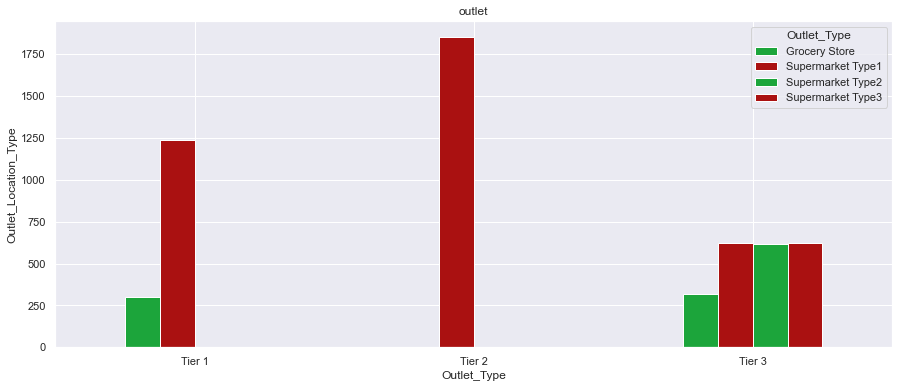

In [56]:
pd.crosstab(df_train.Outlet_Location_Type,df_train.Outlet_Type).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('outlet')
plt.xlabel('Outlet_Type')
plt.xticks(rotation=0)
plt.ylabel('Outlet_Location_Type')
plt.show()

<AxesSubplot:>

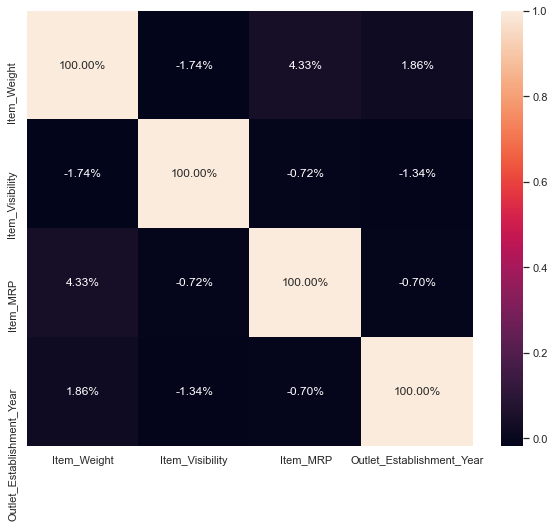

In [57]:
corrs=df_train.dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs,annot=True,fmt='.2%')

In [58]:
#We shall similarly remove the order_size as there is no way to deal with the null values here aswell.
#We would also get rid of the item_identifier and outlet_indetifier 

In [59]:
unn_cols=['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier']

for cols in unn_cols:
    df_train.drop(cols,axis=1,inplace=True)

In [60]:
df_train['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
df_train['Item_Fat_Content'].replace('Regular',0,inplace=True)

In [61]:
df_dummies_type=pd.get_dummies(df_train['Item_Type'])

In [62]:
df_train=df_train.merge(df_dummies_type,on=df_train.index)

In [63]:
df_train.drop('key_0',axis=1,inplace=True)
df_train.drop('Item_Type',axis=1,inplace=True)

In [64]:
df_train['Outlet_Location_Type'].replace('Tier 1',1,inplace=True)
df_train['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
df_train['Outlet_Location_Type'].replace('Tier 3',3,inplace=True)

In [65]:
df_dummies_outlet=pd.get_dummies(df_train['Outlet_Type'])
df_train=df_train.merge(df_dummies_outlet,on=df_train.index)

In [66]:
df_train.drop('key_0',axis=1,inplace=True)
df_train.drop('Outlet_Type',axis=1,inplace=True)

In [67]:
targets=df_train['Item_Outlet_Sales']
df_train.drop('Item_Outlet_Sales',axis=1,inplace=True)
df_train.head()

KeyError: 'Item_Outlet_Sales'

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
X_train,X_test,y_train,y_test=train_test_split(df_train,targets,shuffle=True,test_size=0.2,random_state=0)

NameError: name 'targets' is not defined

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [72]:
reg_lin.score(X_train,y_train)

NameError: name 'X_train' is not defined

In [73]:
reg_lin.score(X_train,y_train)


NameError: name 'X_train' is not defined

In [74]:
rmse_lin=np.sqrt(mean_squared_error(y_preds_lin,y_test))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse_lin))

NameError: name 'y_preds_lin' is not defined

In [75]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=y_preds_lin

sns.lmplot('Target','Predictions',data=reg_lin_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(rmse_lin),size=25)

NameError: name 'y_test' is not defined

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [77]:
rfr=RandomForestRegressor(random_state=0)
param_grid={'n_estimators':[3,4,5,7,9,10,12], 'max_depth':[5,7,9,10,12]}
grid=GridSearchCV(rfr,param_grid,scoring='r2',cv=10)

In [78]:
grid_result=grid.fit(X_train,y_train)
grid_result.best_params_

NameError: name 'X_train' is not defined

In [79]:
grid_result.score(X_train,y_train)

NameError: name 'grid_result' is not defined

In [80]:
y_preds_rfr=grid_result.predict(X_test)
rmse_rfr=np.sqrt(mean_squared_error(y_preds_rfr,y_test))
print('RMSE for Random Forest Regression:{0:.2f}'.format(rmse_rfr))

NameError: name 'grid_result' is not defined

In [81]:
rfr_df=pd.DataFrame()
rfr_df['Target']=y_test
rfr_df['Predictions']=y_preds_rfr

sns.lmplot('Target','Predictions',data=rfr_df,height=6,aspect=2,line_kws={'color':'green'},scatter_kws={'alpha':0.4,'color':'blue'})
plt.title('Random Forest Regression \n RMSE: {0:.2f}'.format(rmse_rfr),size=25)

NameError: name 'y_test' is not defined

In [82]:
def random_forest():
    from sklearn.ensemble import RandomForestRegressor 
    from sklearn.metrics import mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    

    #Model fitting on training set
    rfr = RandomForestRegressor(criterion="mse",max_depth=2,random_state=10)
    rfr.fit(X_train,y_train)
    
    #prediction for train test and test test
    y_pred_train = rfr.predict(X_train)
    y_pred_test = rfr.predict(X_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - rfr.predict(X_train)) ** 2)
    test_mse = np.mean((y_test - rfr.predict(X_test))** 2)
    print('               Decision_Tree        ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    
    print('               Decision_Tree        ')
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)

In [83]:
print(random_forest())

NameError: name 'X_train' is not defined

In [84]:
df_identifiers=pd.DataFrame(df_test['Item_Identifier'])
df_identifiers['Outlet_Identifier']=df_test['Outlet_Identifier']

In [85]:
unn_cols=['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier']

for cols in unn_cols:
    df_test.drop(cols,axis=1,inplace=True)

In [86]:
df_test.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.007565,Snack Foods,107.8622,1999,Tier 1,Supermarket Type1
1,reg,0.038428,Dairy,87.3198,2007,Tier 2,Supermarket Type1
2,Low Fat,0.099575,Others,241.7538,1998,Tier 3,Grocery Store
3,Low Fat,0.015388,Snack Foods,155.0340,2007,Tier 2,Supermarket Type1
4,Regular,0.118599,Dairy,234.2300,1985,Tier 3,Supermarket Type3


In [87]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('low fat','Low Fat')
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('LF','Low Fat')
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('reg','Regular')

In [88]:
df_test['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
df_test['Item_Fat_Content'].replace('Regular',0,inplace=True)

In [89]:
df_dummies_type=pd.get_dummies(df_test['Item_Type'])
df_test=df_test.merge(df_dummies_type,on=df_test.index)

In [90]:
df_test.drop('key_0',axis=1,inplace=True)
df_test.drop('Item_Type',axis=1,inplace=True) 

In [91]:
df_test['Outlet_Location_Type'].replace('Tier 1',1,inplace=True)
df_test['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
df_test['Outlet_Location_Type'].replace('Tier 3',3,inplace=True)

In [92]:
df_dummies_outlet=pd.get_dummies(df_test['Outlet_Type'])
df_test=df_test.merge(df_dummies_outlet,on=df_test.index)

In [93]:
df_test.drop('key_0',axis=1,inplace=True)
df_test.drop('Outlet_Type',axis=1,inplace=True)

In [94]:
df_test.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0.038428,87.3198,2007,2,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0.099575,241.7538,1998,3,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0.015388,155.0340,2007,2,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0.118599,234.2300,1985,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [95]:
df_train.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0.038428,87.3198,2007,2,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0.099575,241.7538,1998,3,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0.015388,155.0340,2007,2,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0.118599,234.2300,1985,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [96]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100,min_samples_split=5)

In [99]:
dtr.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [100]:
dtr.score(X_train,y_train)

NameError: name 'X_train' is not defined